In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from data.create_dataset import *
from visualization.visualize import *
from modelling import ols,ridge
from model_evaluation import *

In [71]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=30)

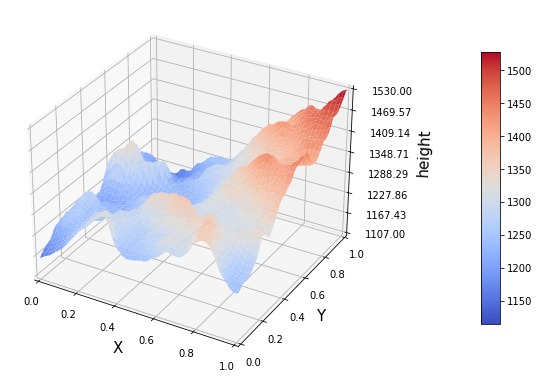

In [18]:
surf = plot_surf_from_X(X,z)

Fitting the surface with higher and higher degree design matrix, we see that(of course) the surface is becoming more equal to the actual terrain.

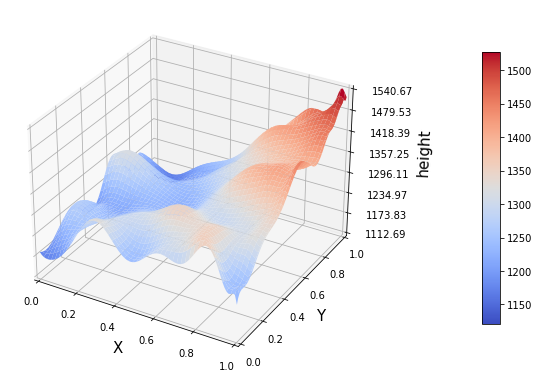

In [38]:
z_tilde = ols.fit_predict(X,z,X)
surf2 = plot_surf_from_X(X,z_tilde)

So what about splitting the data, training on it, and then plotting the result? Does that make sense?

In [20]:
from sklearn.model_selection import  train_test_split

In [77]:
#Using test size 0.19 enables us to plot the training data.
#sqrt(0.81*10 000) = 90
#Squareroot must be whole number for plotting purposes
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=1)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.19)

Since the data is splitted randomly and shuffled, resulting plot is not so pretty. Could be sort it?

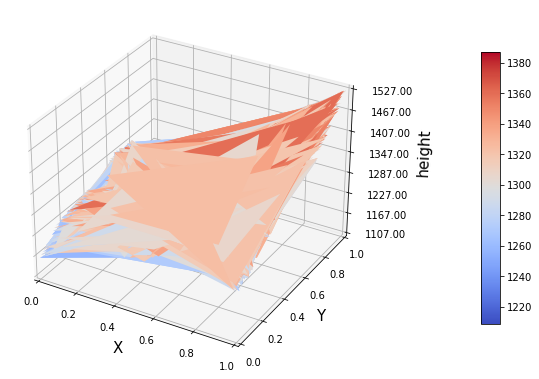

In [78]:
surf3 = plot_surf_from_X(X_train,z_train,90,90)

This is how it should look like for best plotting result. First sorted along x axis, then along y axis. 

In [80]:
print(X)

[[1.         0.         0.        ]
 [1.         0.01010101 0.        ]
 [1.         0.02020202 0.        ]
 ...
 [1.         0.97979798 1.        ]
 [1.         0.98989899 1.        ]
 [1.         1.         1.        ]]


X_train on the other hand shuffled.

In [81]:
print(X_train)

[[1.         0.90909091 0.80808081]
 [1.         0.54545455 0.64646465]
 [1.         0.02020202 0.66666667]
 ...
 [1.         0.78787879 0.50505051]
 [1.         0.04040404 0.73737374]
 [1.         0.44444444 0.96969697]]


Can sort X_train to look similar. It's a sort of Radix sort, only works if sorting is stable(i.e no quicksort). First sort based on x-value. Then sort based on y-value.

In [82]:
p1 = X_train[:,1].argsort(kind='stable')
X_train = X_train[p1]


print(X_train)

[[1.         0.         0.98989899]
 [1.         0.         0.44444444]
 [1.         0.         0.83838384]
 ...
 [1.         1.         0.26262626]
 [1.         1.         0.28282828]
 [1.         1.         0.7979798 ]]


X_train is now sorted correctly. However, must have corresponding z values.

In [83]:
p2 = X_train[:,2].argsort(kind='stable')
X_train = X_train[p2]

print(X_train)

[[1.         0.         0.        ]
 [1.         0.01010101 0.        ]
 [1.         0.02020202 0.        ]
 ...
 [1.         0.96969697 1.        ]
 [1.         0.97979798 1.        ]
 [1.         0.98989899 1.        ]]


Simply sorting z with same permutations should results in correct order.

In [84]:
z_train_sorted = z_train[p1]
z_train_sorted = z_train_sorted[p2]

Which it's not at all...

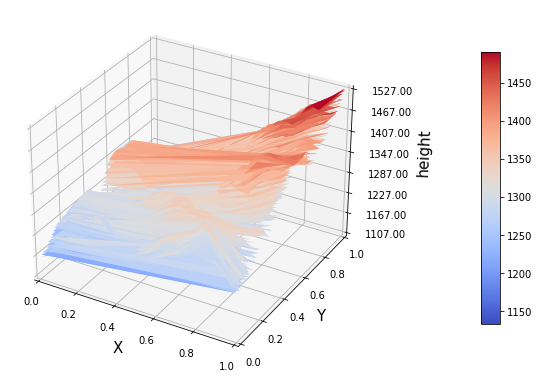

In [85]:
surf4 = plot_surf_from_X(X_train,z_train_sorted,90,90)

Ah, but must be very sure that a sorted version isn't sorted again and then used on z. I.e careful not to overwrite p1 and p2 with wrong indices before z has been sorted.
Creating a function to safeguard against this.

In [91]:
import numpy as np
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=1)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.19)
X_ = np.concatenate((X_train,X_test),axis=0)
z_ = np.concatenate((z_train,z_test),axis=0)
X_.shape

(10000, 3)

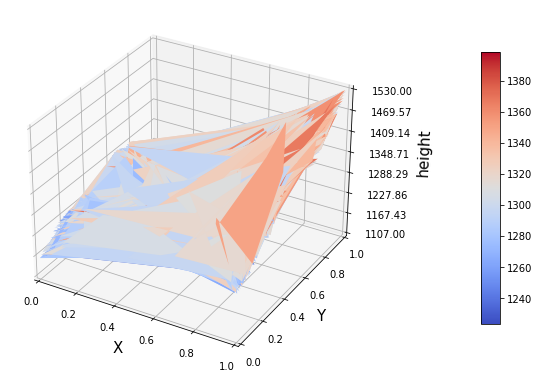

In [94]:
surf5 = plot_surf_from_X(X_,z_)

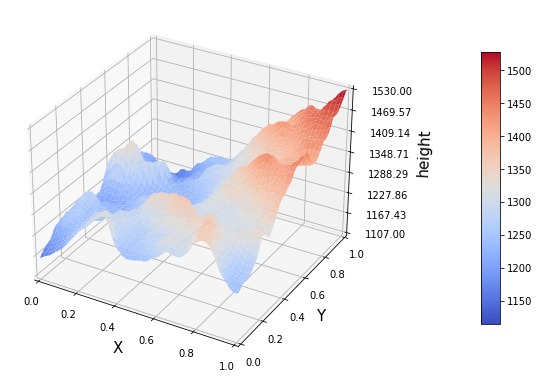

In [97]:
from utils.utils import *
X_, z_ = sort_surface(X_,z_)
surf6 = plot_surf_from_X(X_,z_)

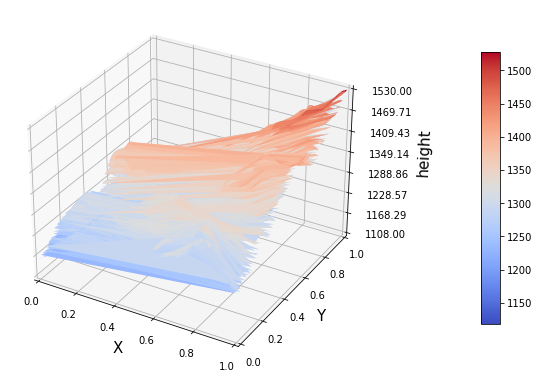

In [100]:
X_train, z_train = sort_surface(X_train, z_train)
surf7 = plot_surf_from_X(X_train, z_train,90,90)

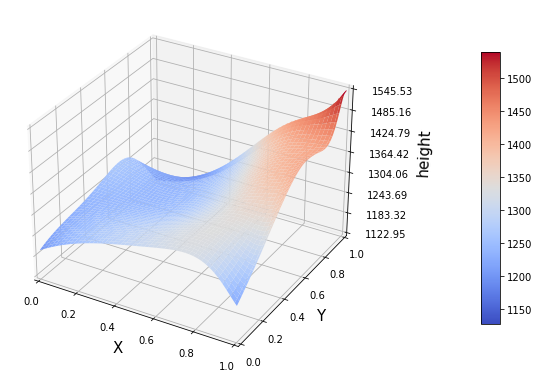

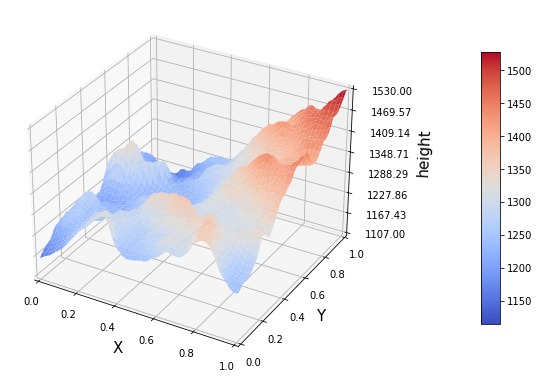

In [111]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=20)
lmb = 0.1
z_ridge = ridge.fit_predict(X,z,X,lmb)
surf = plot_surf_from_X(X,z_ridge)
surf2 = plot_surf_from_X(X,z)